In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel("Copaxone_Trx.xlsx")

In [4]:
df.shape

(72, 2)

In [5]:
df.head()

,Dates,Copaxone_TRx
0,2015-11-01,55743
1,2015-12-01,60787
2,2016-01-01,51570
3,2016-02-01,55726
4,2016-03-01,62638


In [6]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [7]:
df.set_index('Dates', inplace = True)

In [8]:
df.head()

,Copaxone_TRx
Dates,
2015-11-01,55743
2015-12-01,60787
2016-01-01,51570
2016-02-01,55726
2016-03-01,62638


<AxesSubplot:xlabel='Dates'>

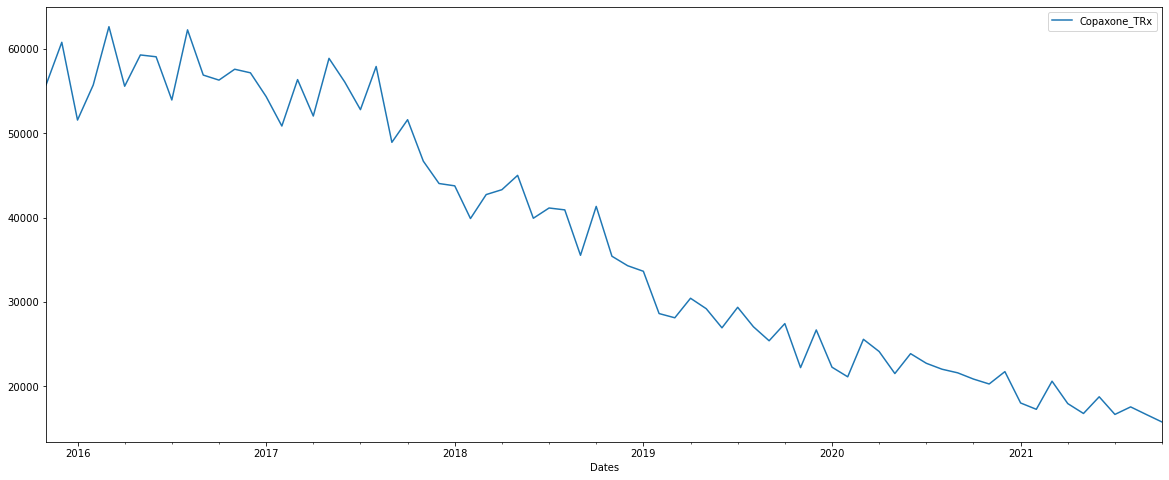

In [9]:
df.plot(figsize = (20, 8))

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
test_result = adfuller(df['Copaxone_TRx'])

In [12]:
#H-0: It is non Stationary
#H-1: It is Stationary

def adfuller_test(Copaxone_TRx):
    result = adfuller(Copaxone_TRx)
    labels = ["ADF Test Statistics", "P-Value", "# Lags Used", "Number of Observations Used"]
    for value, label in zip(result, labels):
        print(label + ' : ' +str(value))
    if result[1] <= 0.05:
        Print("Strong evidence aganist the Null Hypothesis(H-0), reject the Null Hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence aganist Null Hypothesis, time series has a unit root, indicating it is non-stationary")

In [13]:
adfuller_test(df['Copaxone_TRx'])

ADF Test Statistics : -1.2682566613019115
P-Value : 0.6435669578165728
# Lags Used : 12
Number of Observations Used : 59
Weak evidence aganist Null Hypothesis, time series has a unit root, indicating it is non-stationary


#### DIFFRENCING

In [14]:
df['Copaxone_TRx_First_Diff'] = df['Copaxone_TRx'] - df['Copaxone_TRx'].shift(1)

In [15]:
df.head()

,Copaxone_TRx,Copaxone_TRx_First_Diff
Dates,,
2015-11-01,55743,NaN
2015-12-01,60787,5044.0
2016-01-01,51570,-9217.0
2016-02-01,55726,4156.0
2016-03-01,62638,6912.0


In [16]:
df['Copaxone_TRx_Second_Diff'] = df['Copaxone_TRx'] - df['Copaxone_TRx_First_Diff'].shift(1)

In [17]:
df.head()

,Copaxone_TRx,Copaxone_TRx_First_Diff,Copaxone_TRx_Second_Diff
Dates,,,
2015-11-01,55743,NaN,NaN
2015-12-01,60787,5044.0,NaN
2016-01-01,51570,-9217.0,46526.0
2016-02-01,55726,4156.0,64943.0
2016-03-01,62638,6912.0,58482.0


In [18]:
adfuller_test(df['Copaxone_TRx_Second_Diff'].dropna())

ADF Test Statistics : -1.8453694301467574
P-Value : 0.35818082982754723
# Lags Used : 11
Number of Observations Used : 58
Weak evidence aganist Null Hypothesis, time series has a unit root, indicating it is non-stationary


<AxesSubplot:xlabel='Dates'>

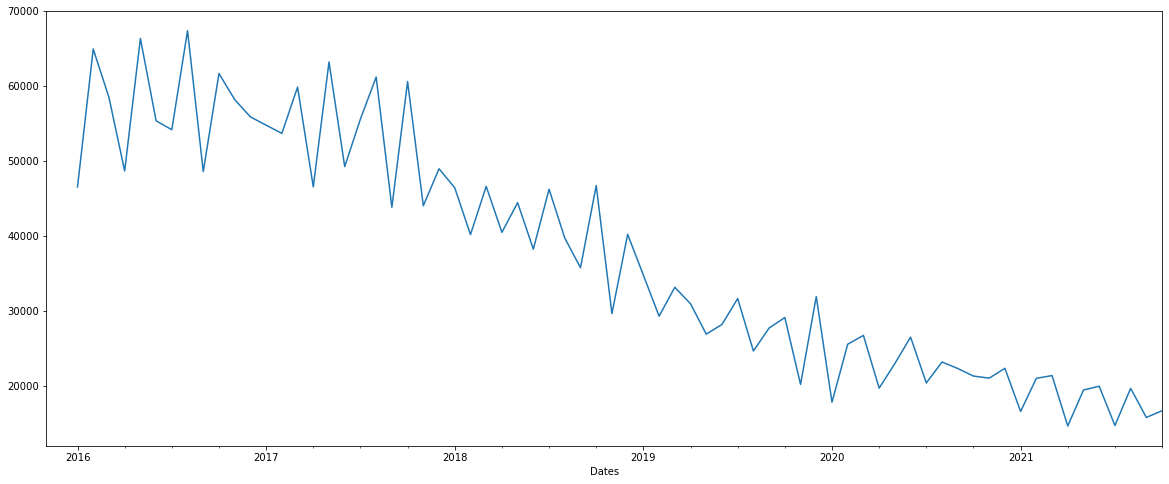

In [19]:
fig, ax = plt.subplots(figsize = (20, 8))
df['Copaxone_TRx_Second_Diff'].plot(ax = ax)

<AxesSubplot:xlabel='Dates'>

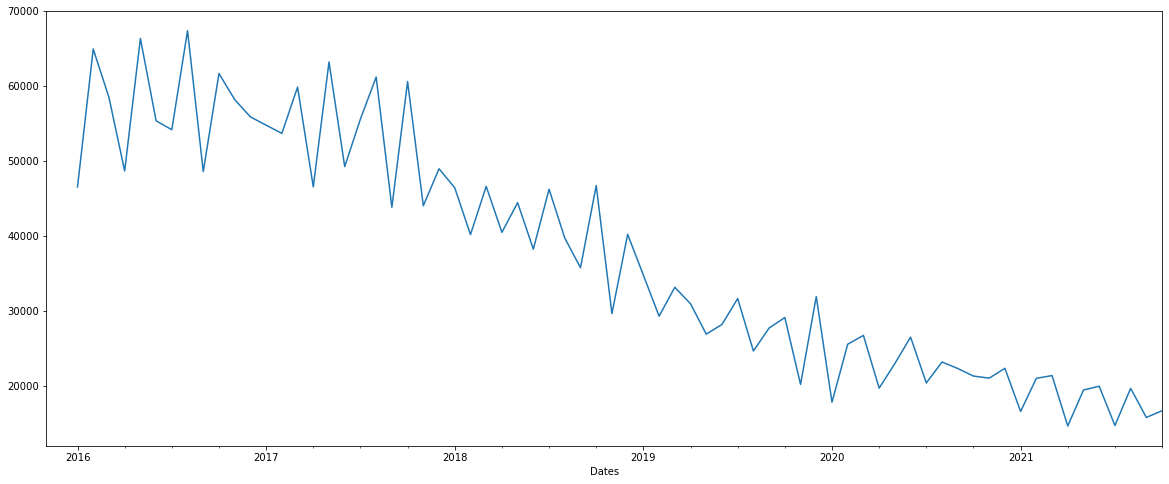

In [20]:
df['Copaxone_TRx_Second_Diff'].plot(figsize = (20,8))

In [21]:
df['Seasonal First Difference'] = df['Copaxone_TRx'] - df['Copaxone_TRx'].shift(12)

In [22]:
df.head

<bound method NDFrame.head of             Copaxone_TRx  Copaxone_TRx_First_Diff  Copaxone_TRx_Second_Diff  \
Dates                                                                         
2015-11-01         55743                      NaN                       NaN   
2015-12-01         60787                   5044.0                       NaN   
2016-01-01         51570                  -9217.0                   46526.0   
2016-02-01         55726                   4156.0                   64943.0   
2016-03-01         62638                   6912.0                   58482.0   
...                  ...                      ...                       ...   
2021-06-01         18764                   1979.0                   19937.0   
2021-07-01         16674                  -2090.0                   14695.0   
2021-08-01         17565                    891.0                   19655.0   
2021-09-01         16661                   -904.0                   15770.0   
2021-10-01         157

In [23]:
adfuller_test(df['Copaxone_TRx_First_Diff'].dropna())

ADF Test Statistics : -2.008485659236134
P-Value : 0.2828648726833849
# Lags Used : 11
Number of Observations Used : 59
Weak evidence aganist Null Hypothesis, time series has a unit root, indicating it is non-stationary


In [24]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistics : -2.118974407694482
P-Value : 0.23695365877027014
# Lags Used : 9
Number of Observations Used : 50
Weak evidence aganist Null Hypothesis, time series has a unit root, indicating it is non-stationary


<AxesSubplot:xlabel='Dates'>

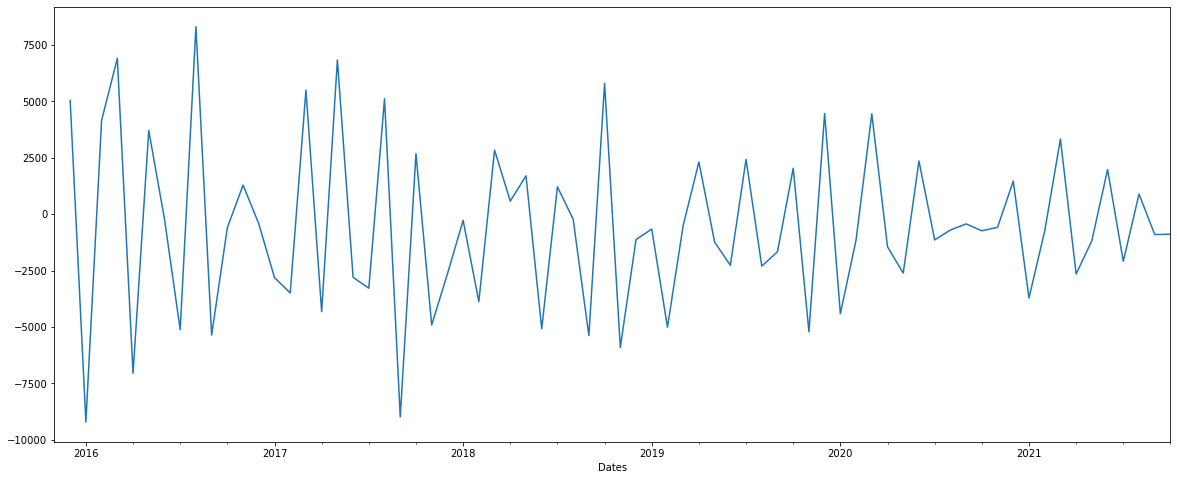

In [25]:
fig, ax = plt.subplots(figsize = (20, 8))
df['Copaxone_TRx_First_Diff'].plot(ax = ax)

In [26]:
from pandas.plotting import autocorrelation_plot

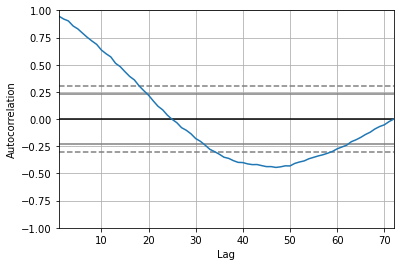

In [27]:
autocorrelation_plot(df['Copaxone_TRx'])
plt.show()

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [29]:
import statsmodels.api as sm

AttributeError: 'list' object has no attribute 'iloc'

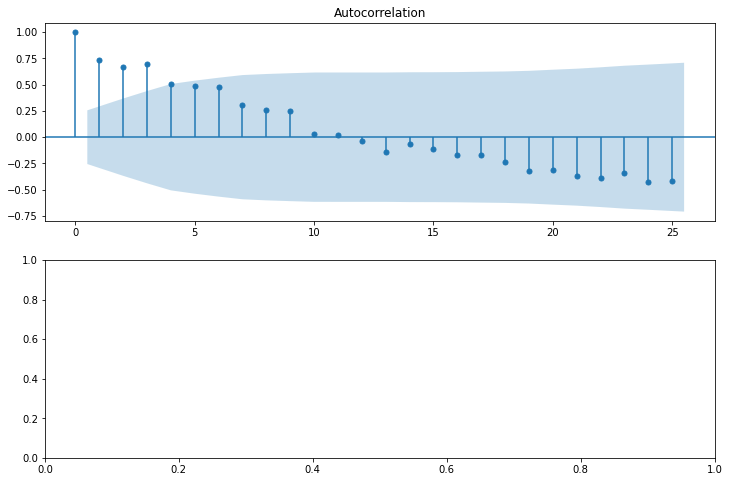

In [30]:
fig = plt.figure(figsize = (12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags = 25, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(['Seasonal First Difference'].iloc[13:], lags = 25, ax = ax2)

In [31]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [32]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA', FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA', FutureWarning)

In [33]:
model = ARIMA(df['Copaxone_TRx'], order = (1, 2, 1))
model_fit = model.fit()

C:\Users\vishal.desai\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\vishal.desai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred f

<AxesSubplot:xlabel='Dates'>

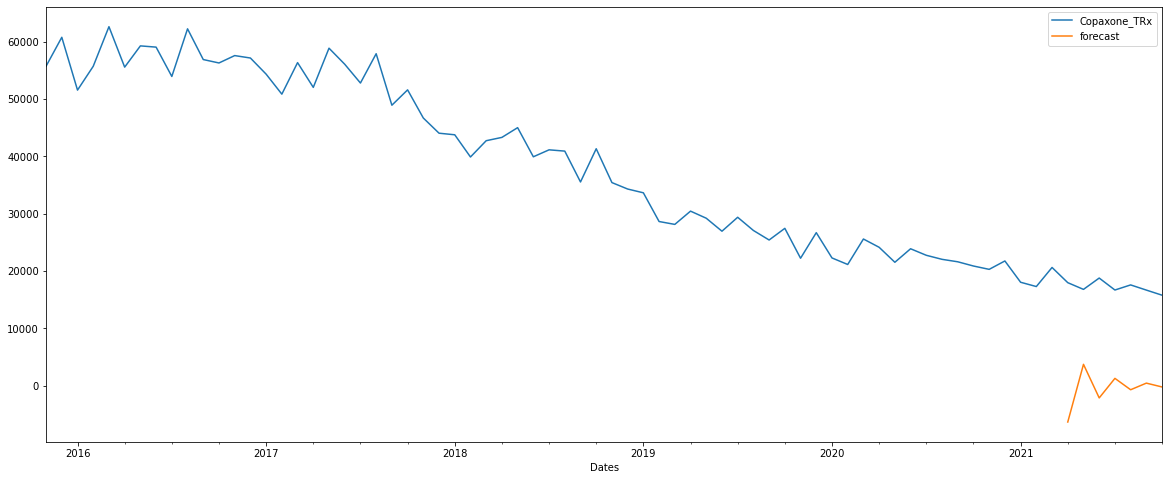

In [34]:
df['forecast'] = model_fit.predict(start = 65, end = 72, dynamic = True)
df[['Copaxone_TRx', 'forecast']].plot(figsize = (20,8))

In [35]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.Copaxone_TRx   No. Observations:                   70
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -663.340
Method:                       css-mle   S.D. of innovations           3033.705
Date:                Fri, 07 Jan 2022   AIC                           1334.679
Time:                        20:59:22   BIC                           1343.673
Sample:                    01-01-2016   HQIC                          1338.252
                         - 10-01-2021                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.5665     11.282     -0.139      0.890     -23.678      20.545
ar.L1.D2.Copaxone_TRx    -0.5821      0.097     -5.991      0.000      -0.773      -0.392
ma.L1.D2.Copaxone_TRx    -0.9998      0.046    -21.892      0.000      -1.089      -0.910
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7179           +0.0000j            1.7179            0.5000
MA.1            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""

In [36]:
model = sm.tsa.statespace.SARIMAX(df['Copaxone_TRx'], order = (2, 1, 1), seasonal_order = (2, 2, 2, 12))
results = model.fit()

C:\Users\vishal.desai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\vishal.desai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\vishal.desai\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vishal.desai\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\vishal.desai\Anaconda3\lib\site-pack

<AxesSubplot:xlabel='Dates'>

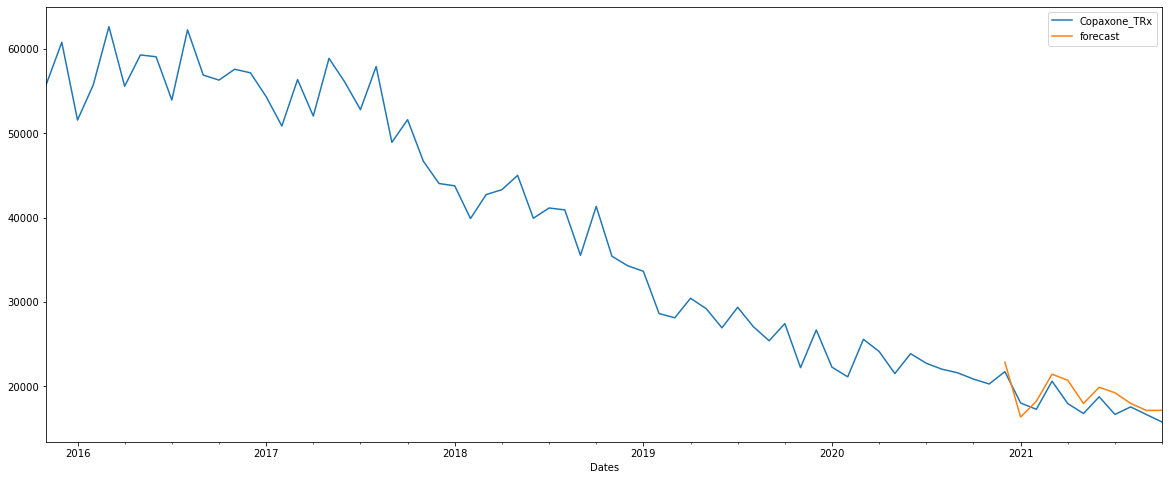

In [37]:
df['forecast'] = results.predict(start = 61, end = 72, dynamic = True)
df[['Copaxone_TRx', 'forecast']].plot(figsize = (20, 8))

In [38]:
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months = x) for x in range(0, 24)]

In [39]:
future_datest_df = pd.DataFrame(index = future_dates[1:], columns = df.columns)

In [40]:
future_datest_df.tail()

,Copaxone_TRx,Copaxone_TRx_First_Diff,Copaxone_TRx_Second_Diff,Seasonal First Difference,forecast
2023-05-01,NaN,NaN,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN,NaN,NaN
2023-07-01,NaN,NaN,NaN,NaN,NaN
2023-08-01,NaN,NaN,NaN,NaN,NaN
2023-09-01,NaN,NaN,NaN,NaN,NaN


In [41]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

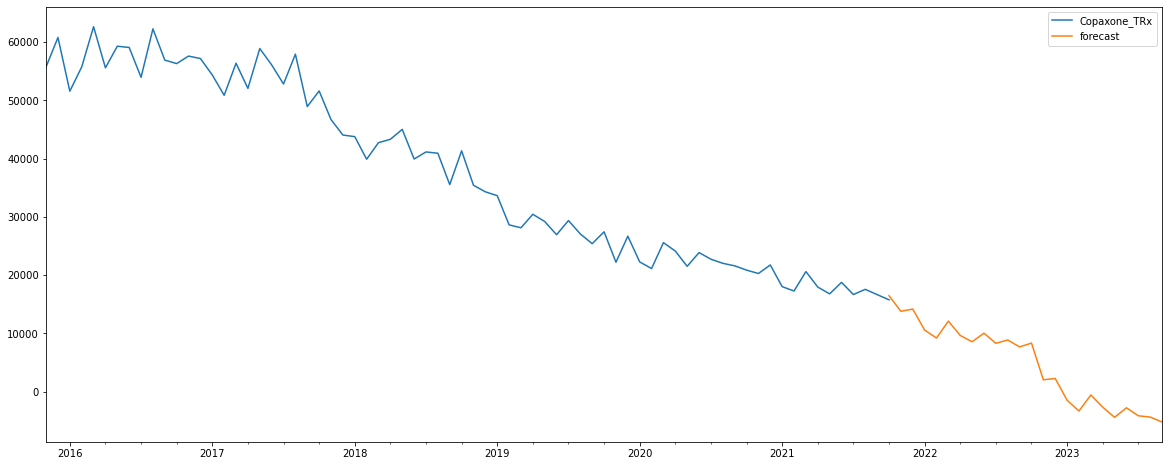

In [42]:
future_df['forecast'] = results.predict(start = 71, end = 94, dynamic = True)  
future_df[['Copaxone_TRx', 'forecast']].plot(figsize = (20, 8)) 